# LDA

## Preprocessing

In [ ]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
import matplotlib.pyplot as plt

### Download Data


In [ ]:
from sklearn.datasets import fetch_20newsgroups

#categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space' , ]  # Choose desired categories
data = fetch_20newsgroups(subset='train',  shuffle=True, random_state=42, remove=('footers', 'quotes'))
print("Number of documents:", len(data.data))

Number of documents: 11314


In [ ]:
# Get the text data and target labels
documents = data.data
labels = data.target

# Print a few sample documents
num_samples = 5  # Number of sample documents to print

def printSampleDocuments(docs):
    for i in range(min(num_samples, len(docs))):
        print(f"Document {i+1}:")
        print(f"Category: {data.target_names[labels[i]]}")
        print(docs[i])
        print("---------------------------------------------------\n")

printSampleDocuments(documents)

Document 1:
Category: rec.autos
From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.
---------------------------------------------------

Document 2:
Category: comp.sys.mac.hardware
From: guykuo@carson.u.washington.edu (Guy Kuo)
Subject: SI Clock Poll - Final Call
Summary: Final call for SI clock reports
Keywords: SI,acceleration,clock,upgrade
Article-I.D.: shelley.1qvfo9INNc3s
Organization: University 

### Metadata Extraction - cleaned_documents



In [ ]:
# Split document by double newlines, drop the first block, and combine again as a string
import re
cleaned_documents = []
subjects = []
keywords = []
organizations = []
i = 1
for document in documents:
    blocks = re.split(r'\n\s*\n', document)
    if(i<100):
        print(blocks[0])
        i += 1
    subjects.append(re.findall('Subject: (.*)\n', blocks[0]) + re.findall('Summary: (.*)\n', blocks[0]))
    keywords.append(re.findall('Keywords: (.*)\n', blocks[0]))
    organizations.append(re.findall('Organization: (.*)\n', blocks[0]))
    cleaned_document = '\n'.join(blocks[1:])  # Drop the first block
    cleaned_documents.append(cleaned_document)

# Print a few sample cleaned document bodies
num_samples = 5  # Number of sample documents to print

print(subjects[:num_samples])
print(keywords[:num_samples])
print(organizations[:num_samples])
'''
for i in range(num_samples):
    print(f"Document {i+1}:")
    print(f"Category: {data.target_names[labels[i]]}")

    cleaned_document = cleaned_documents[i]
    print(cleaned_document.strip())  # Print the cleaned document body
    print("---------------------------------------------------\n")
'''
printSampleDocuments(cleaned_documents)

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15
From: guykuo@carson.u.washington.edu (Guy Kuo)
Subject: SI Clock Poll - Final Call
Summary: Final call for SI clock reports
Keywords: SI,acceleration,clock,upgrade
Article-I.D.: shelley.1qvfo9INNc3s
Organization: University of Washington
Lines: 11
NNTP-Posting-Host: carson.u.washington.edu
From: twillis@ec.ecn.purdue.edu (Thomas E Willis)
Subject: PB questions...
Organization: Purdue University Engineering Computer Network
Distribution: usa
Lines: 36
From: jgreen@amber (Joe Green)
Subject: Re: Weitek P9000 ?
Organization: Harris Computer Systems Division
Lines: 14
Distribution: world
NNTP-Posting-Host: amber.ssd.csd.harris.com
X-Newsreader: TIN [version 1.1 PL9]
From: jcm@head-cfa.harvard.edu (Jonathan McDowell)
Subject: Re: Shuttle Launch Question
Organization: Smithsonian Astrophysical Observatory, Cambridge, MA,  USA

# Removing Stopwords
Defined in advance to catch every form of possible stopwords

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stopwords_list = stopwords.words('english')
#custom = ["article", "writes", "entry", "date", "udel", "said", "tell", "think", "know", "just", "newsgroup",
   #                  "line", "like", "does", "going", "make", "thanks", "could", "would", "re"]
#stopwords_list.extend(custom)
#stopwords_list = set(stopwords_list)

In [ ]:
def removeStopwords(documentList):
    stopword_removed_documents = []
    for tokens in documentList:
        filtered_tokens = [token for token in tokens if token not in stopwords_list]
        stopword_removed_documents.append(filtered_tokens)
    return stopword_removed_documents

# Tokenization - tokenized_documents


In [ ]:
REMOVE_DIGITS = True
MIN_TOKEN_LEN = 4

import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
tokenized_documents = []

for document in cleaned_documents:
    tokens = nltk.word_tokenize(document)
    filtered_tokens = [token for token in tokens if len(token) >= 4]
    tokenized_documents.append(filtered_tokens)

stopwords_list = set(stopwords_list)
stopword_removed_documents = []
for tokens in tokenized_documents:
    filtered_tokens = [token.lower() for token in tokens if token.lower() not in stopwords_list]
    stopword_removed_documents.append(filtered_tokens)
tokenized_documents = stopword_removed_documents

In [ ]:
tokenized_documents = []
tokenized_subjects = []
tokenized_keywords = []
tokenized_organization = []
for document in cleaned_documents:
    document = re.sub('[0-9]+', ' ', document) if REMOVE_DIGITS else document
    tokens = nltk.word_tokenize(document)
    filtered_tokens = [token.lower() for token in tokens if len(token) >= MIN_TOKEN_LEN]
    tokenized_documents.append(filtered_tokens)
for subject_set in subjects:
    tokenized_sub = []
    for subject in subject_set:
        sub = re.sub('[0-9]+', ' ', subject) if REMOVE_DIGITS else subject
def tokenizeTexts(textList):
    for

subjects = []
keywords = []
organizations = []

tokenized_documents = removeStopwords(tokenized_documents)

printSampleDocuments(tokenized_documents)
'''
# Print a few sample tokenized documents
num_samples = 5  # Number of sample documents to print

for i in range(num_samples):
    print(f"Document {i+1}:")
    print(f"Category: {data.target_names[labels[i]]}")

    tokens = tokenized_documents[i]
    print(tokens)
    print("---------------------------------------------------\n")
'''

Document 1:
Category: rec.autos
['wondering', 'anyone', 'there', 'could', 'enlighten', 'this', 'other', '-door', 'sports', 'looked', 'from', 'late', 'early', 'called', 'bricklin', 'doors', 'were', 'really', 'small', 'addition', 'front', 'bumper', 'separate', 'from', 'rest', 'body', 'this', 'know', 'anyone', 'tellme', 'model', 'name', 'engine', 'specs', 'years', 'production', 'where', 'this', 'made', 'history', 'whatever', 'info', 'have', 'this', 'funky', 'looking', 'please', 'e-mail', 'thanks', 'brought', 'your', 'neighborhood', 'lerxst']
---------------------------------------------------

Document 2:
Category: comp.sys.mac.hardware
['fair', 'number', 'brave', 'souls', 'upgraded', 'their', 'clock', 'oscillator', 'have', 'shared', 'their', 'experiences', 'this', 'poll', 'please', 'send', 'brief', 'message', 'detailing', 'your', 'experiences', 'with', 'procedure', 'speed', 'attained', 'rated', 'speed', 'cards', 'adapters', 'heat', 'sinks', 'hour', 'usage', 'floppy', 'disk', 'functionali

# Lemmatize tokens - lemmatized_documents


In [ ]:
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
lemmatized_documents = []
lemmatizer = WordNetLemmatizer()

for tokens in tokenized_documents:
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    lemmatized_documents.append(lemmatized_tokens)

#lemmatized_documents = removeStopwords(lemmatized_documents)
printSampleDocuments(lemmatized_documents)

Document 1:
Category: rec.autos
['wondering', 'anyone', 'could', 'enlighten', '2-door', 'sport', 'looked', 'late', '60s/', 'early', 'called', 'bricklin', 'door', 'really', 'small', 'addition', 'front', 'bumper', 'separate', 'rest', 'body', 'know', 'anyone', 'tellme', 'model', 'name', 'engine', 'spec', 'year', 'production', 'made', 'history', 'whatever', 'info', 'funky', 'looking', 'please', 'e-mail']
---------------------------------------------------

Document 2:
Category: comp.sys.mac.hardware
['fair', 'number', 'brave', 'soul', 'upgraded', 'clock', 'oscillator', 'shared', 'experience', 'poll', 'please', 'send', 'brief', 'message', 'detailing', 'experience', 'procedure', 'speed', 'attained', 'rated', 'speed', 'card', 'adapter', 'heat', 'sink', 'hour', 'usage', 'floppy', 'disk', 'functionality', 'floppy', 'especially', 'requested', 'summarizing', 'next', 'day', 'please', 'network', 'knowledge', 'base', 'done', 'clock', 'upgrade', 'answered', 'poll', 'thanks']
-------------------------

#Stemm tokens - stemmed_documents

In [ ]:
from nltk.stem.wordnet import PorterStemmer

In [ ]:
stemmed_documents = []
stemmer = PorterStemmer()

for tokens in lemmatized_documents:
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    stemmed_documents.append(stemmed_tokens)

stemmed_documents = removeStopwords(stemmed_documents)
printSampleDocuments(stemmed_documents)

Document 1:
Category: rec.autos
['wonder', 'anyon', 'enlighten', '-door', 'sport', 'look', 'late', 'earli', 'call', 'bricklin', 'door', 'realli', 'small', 'addit', 'front', 'bumper', 'separ', 'rest', 'bodi', 'anyon', 'tellm', 'model', 'name', 'engin', 'spec', 'year', 'product', 'made', 'histori', 'whatev', 'info', 'funki', 'look', 'pleas', 'e-mail', 'brought', 'neighborhood', 'lerxst']
---------------------------------------------------

Document 2:
Category: comp.sys.mac.hardware
['fair', 'number', 'brave', 'soul', 'upgrad', 'clock', 'oscil', 'share', 'experi', 'poll', 'pleas', 'send', 'brief', 'messag', 'detail', 'experi', 'procedur', 'speed', 'attain', 'rate', 'speed', 'card', 'adapt', 'heat', 'sink', 'hour', 'usag', 'floppi', 'disk', 'function', 'floppi', 'especi', 'request', 'summar', 'next', 'day', 'pleas', 'network', 'knowledg', 'base', 'done', 'clock', 'upgrad', 'answer', 'poll', 'guykuo', 'u.washington.edu']
---------------------------------------------------

Document 3:
Cate

In [ ]:
n_documents = len(stemmed_documents)
print("Number of documents:", n_documents)

Number of documents: 11314


# Model Train

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:

vectorizer = CountVectorizer(min_df =5, token_pattern=r'\b[a-zA-Z]{4,}\b')
#vectorized_docs = vectorizer.fit_transform([' '.join(tokens) for tokens in stemmed_documents])
#vectorized_docs = vectorizer.fit_transform([' '.join(tokens) for tokens in lemmatized_documents])
vectorized_docs = vectorizer.fit_transform([' '.join(tokens) for tokens in tokenized_documents])


In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

# Create the LDA model
n_topics = 15  # Specify the number of topics
lda_model = LatentDirichletAllocation(n_components=n_topics, random_state=42)
#ctm_model =LatentDirichletAllocation(n_components=n_topics, random_state=42, )
# Fit the LDA model to the vectorized documents
lda_model.fit(vectorized_docs)

LatentDirichletAllocation(n_components=15, random_state=42)

# Show Topics


In [ ]:
# Get the top words for each topic
n_top_words = 7
feature_names = vectorizer.get_feature_names_out()

for topic_idx, topic in enumerate(lda_model.components_):
    top_words_idx = topic.argsort()[:-n_top_words - 1:-1]
    top_words = [feature_names[i] for i in top_words_idx]
    print(f"Topic #{topic_idx}: {', '.join(top_words)}")

Topic #0: would, like, think, much, could, good, time
Topic #1: file, internet, window, anonymous, widget, list, mail
Topic #2: team, game, year, games, season, hockey, play
Topic #3: entry, number, public, keys, encryption, people, even
Topic #4: guns, would, water, crime, used, insurance, rate
Topic #5: would, people, think, believe, many, true, question
Topic #6: president, would, know, stephanopoulos, think, going, bike
Topic #7: said, would, people, jesus, know, could, time
Topic #8: drive, space, scsi, disk, system, hard, drives
Topic #9: please, thanks, would, anyone, like, know, mail
Topic #10: people, government, armenian, israel, turkish, would, armenians
Topic #11: right, people, would, state, amendment, well, militia
Topic #12: university, research, space, center, nasa, information, national
Topic #13: windows, file, software, program, available, also, version
Topic #14: encryption, chip, period, clipper, technology, government, enforcement


In [ ]:
from tabulate import tabulate


In [ ]:
topic_data = [
    ["Topic 0", "would", "like", "think", "much", "could", "good", "time"],
    ["Topic 1", "file", "internet", "window", "anonymous", "widget", "list", "mail"],
    ["Topic 2", "team", "game", "year", "games", "season", "hockey", "play"],
    ["Topic 3", "entry", "number", "public", "keys", "encryption", "people", "even"],
    ["Topic 4", "guns", "would", "water", "crime", "used", "insurance", "rate"],
    ["Topic 5", "would", "people", "think", "believe", "many", "true", "question"],
    ["Topic 6", "president", "would", "know", "stephanopoulos", "think", "going", "bike"],
    ["Topic 7", "said", "would", "people", "jesus", "know", "could", "time"],
    ["Topic 8", "drive", "space", "scsi", "disk", "system", "hard", "drives"],
    ["Topic 9", "please", "thanks", "would", "anyone", "like", "know", "mail"],
    ["Topic 10", "people", "government", "armenian", "israel", "turkish", "would", "armenians"],
    ["Topic 11", "right", "people", "would", "state", "amendment", "well", "militia"],
    ["Topic 12", "university", "research", "space", "center", "nasa", "information", "national"],
    ["Topic 13", "windows", "file", "software", "program", "available", "also", "version"],
    ["Topic 14", "encryption", "chip", "period", "clipper", "technology", "government", "enforcement"]
]


# Set the table headers
#headers = ["Topic Number"]

# Generate the table
table = tabulate(topic_data, headers = [], tablefmt="fancy_outline")

# Print the table
print(table)

╒══════════╤════════════╤════════════╤══════════╤════════════════╤════════════╤═════════════╤═════════════╕
│ Topic 0  │ would      │ like       │ think    │ much           │ could      │ good        │ time        │
│ Topic 1  │ file       │ internet   │ window   │ anonymous      │ widget     │ list        │ mail        │
│ Topic 2  │ team       │ game       │ year     │ games          │ season     │ hockey      │ play        │
│ Topic 3  │ entry      │ number     │ public   │ keys           │ encryption │ people      │ even        │
│ Topic 4  │ guns       │ would      │ water    │ crime          │ used       │ insurance   │ rate        │
│ Topic 5  │ would      │ people     │ think    │ believe        │ many       │ true        │ question    │
│ Topic 6  │ president  │ would      │ know     │ stephanopoulos │ think      │ going       │ bike        │
│ Topic 7  │ said       │ would      │ people   │ jesus          │ know       │ could       │ time        │
│ Topic 8  │ drive      │ sp

In [ ]:
topic_data = [
    ["Topic 0", "jesus", "would", "christ", "people", "time"],
    ["Topic 1", "file", "internet", "anonymous", "bill", "information" ],
    ["Topic 2", "people", "would", "think", "know", "like"],
    ["Topic 3", "writes", "article", "would", "could", "think"],
    ["Topic 4", "drive", "disk", "scsi", "anyone", "know"],
    ["Topic 5", "chip", "encryption", "keys", "clipper", "number"],
    ["Topic 6", "year", "team", "game", "good", "games"],
    ["Topic 7", "period", "writes", "power", "keith", "play"],
    ["Topic 8", "writes", "article", "iuic", "scsi", "would"],
    ["Topic 9", "space", "nasa", "research", "health", "center"],
    ["Topic 10", "jews", "article", "israel", "writes", "israeli"],
    ["Topic 11", "file", "entry", "output", "program", "jpeg"],
    ["Topic 12", "would", "people", "writes", "article", "could"],
    ["Topic 13", "year", "health", "disease", "medical", "time"],
    ["Topic 14", "launch", "space", "scsi", "engine", "satellite"]
]


# Set the table headers
#headers = ["Topic Number"]

# Generate the table
table = tabulate(topic_data, headers = [], tablefmt="fancy_outline")

# Print the table
print(table)

╒══════════╤════════╤════════════╤═══════════╤═════════╤═════════════╕
│ Topic 0  │ jesus  │ would      │ christ    │ people  │ time        │
│ Topic 1  │ file   │ internet   │ anonymous │ bill    │ information │
│ Topic 2  │ people │ would      │ think     │ know    │ like        │
│ Topic 3  │ writes │ article    │ would     │ could   │ think       │
│ Topic 4  │ drive  │ disk       │ scsi      │ anyone  │ know        │
│ Topic 5  │ chip   │ encryption │ keys      │ clipper │ number      │
│ Topic 6  │ year   │ team       │ game      │ good    │ games       │
│ Topic 7  │ period │ writes     │ power     │ keith   │ play        │
│ Topic 8  │ writes │ article    │ iuic      │ scsi    │ would       │
│ Topic 9  │ space  │ nasa       │ research  │ health  │ center      │
│ Topic 10 │ jews   │ article    │ israel    │ writes  │ israeli     │
│ Topic 11 │ file   │ entry      │ output    │ program │ jpeg        │
│ Topic 12 │ would  │ people     │ writes    │ article │ could       │
│ Topi

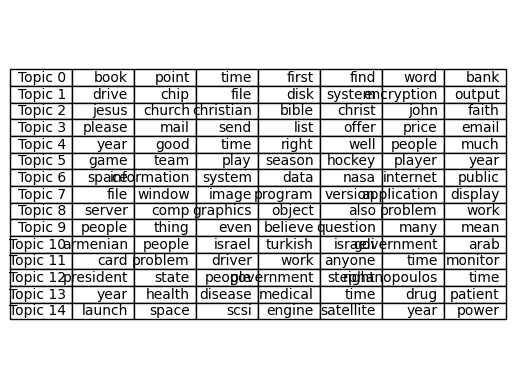

In [ ]:
import matplotlib.pyplot as plt

# Create the table
fig, ax = plt.subplots()
table = ax.table(cellText=topic_data, loc='center')

# Modify the table appearance if needed
table.auto_set_font_size(False)
table.set_fontsize(10)

# Hide the axes
ax.axis('off')

# Save the table as an image
plt.savefig('topic_table.png', bbox_inches='tight')


In [ ]:
# Infer topic distribution for a document
document_index = 0
document_topic_distribution = lda_model.transform(vectorized_docs[document_index])
print(f"Topic distribution for Document #{document_index}:")
print(document_topic_distribution)

Topic distribution for Document #0:
[[0.77431582 0.00185186 0.20161004 0.00185185 0.00185186 0.00185186
  0.00185185 0.00185186 0.00185186 0.00185186 0.00185186 0.00185186
  0.00185185 0.00185186 0.00185186]]


# Correlated Model


In [ ]:
import numpy as np
import scipy.special as sps

In [ ]:
pip install pyvis


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 19.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 76.6 MB/s eta 0:00:00


In [ ]:
pip install tomotopy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 53.3 MB/s eta 0:00:00


In [ ]:
import tomotopy as tp
import nltk
from nltk.corpus import stopwords
import re
from sklearn.datasets import fetch_20newsgroups
from pyvis.network import Network

In [ ]:
#porter_stemmer = nltk.PorterStemmer().stem
pat = re.compile('^[a-z]{4,}$')
#corpus = tp.utils.Corpus(
 #      tokenizer=tp.utils.SimpleTokenizer(),
  #    stopwords=lambda x: x in stopwords_list or not pat.match(x))
corpus = tp.utils.Corpus( stopwords=lambda x:  not pat.match(x))
for document in lemmatized_documents:
    corpus.add_doc(document)

#model = tp.LDAModel(k=5, corpus=corpus)
#model.train(100)
# save preprocessed corpus for reuse
corpus.save('preprocessed_20news.cps')

In [ ]:
mdl = tp.CTModel(min_df=5, k=20, corpus=corpus)
mdl.train(0)

In [ ]:
#mdl.num_beta_sample = 5
print('Num docs:{}, Num Vocabs:{}, Total Words:{}'.format(
   len(mdl.docs), len(mdl.used_vocabs), mdl.num_words
))
print('Removed Top words: ', *mdl.removed_top_words)


Num docs:11295, Num Vocabs:15670, Total Words:1118918
Removed Top words: 


In [ ]:
for i in range(0, 10):
    print('Iteration: {:04}, LL per word: {:.4}'.format(i, mdl.ll_per_word))
    mdl.train(10)
print('Iteration: {:04}, LL per word: {:.4}'.format(320, mdl.ll_per_word))

Iteration: 0000, LL per word: -9.525
Iteration: 0001, LL per word: -8.026
Iteration: 0002, LL per word: -7.586
Iteration: 0003, LL per word: -7.333
Iteration: 0004, LL per word: -7.232
Iteration: 0005, LL per word: -7.177
Iteration: 0006, LL per word: -7.152
Iteration: 0007, LL per word: -7.133
Iteration: 0008, LL per word: -7.114
Iteration: 0009, LL per word: -7.103
Iteration: 0320, LL per word: -7.089


In [ ]:
mdl.summary()

<Basic Info>
| CTModel (current version: 0.12.4)
| 10526 docs, 774348 words
| Total Vocabs: 49055, Used Vocabs: 11910
| Entropy of words: 8.22156
| Entropy of term-weighted words: 8.22156
| Removed Vocabs: <NA>
|
<Training Info>
| Iterations: 200, Burn-in steps: 0
| Optimization Interval: 2
| Log-likelihood per word: -6.91299
|
<Initial Parameters>
| tw: TermWeight.ONE
| min_cf: 0 (minimum collection frequency of words)
| min_df: 5 (minimum document frequency of words)
| rm_top: 0 (the number of top words to be removed)
| k: 20 (the number of topics between 1 ~ 32767)
| smoothing_alpha: [0.1] (small smoothing value for preventing topic counts to be zero, given as a single `float` in case of symmetric and as a list with length `k` of `float` in case of asymmetric.)
| eta: 0.01 (hyperparameter of Dirichlet distribution for topic-word)
| seed: 2542195734 (random seed)
| trained in version 0.12.4
|
<Parameters>
| prior_mean (Prior mean of Logit-normal for the per-document topic distributio

In [ ]:
from tabulate import tabulate

topic_data = [
    ["Labels for topic 8: ", "words: ", "Likelihood of the word to the topic:"],
    [],
    ["representative", "people", "0.024152597412467003"],
    ["february", "state", "0.015195026993751526"],
    ["congressional", "government", "0.01433244626969099"],
    ["united", "right", "0.010318126529455185"],
    ["united state", "general", "0.00962142739444971"],
    ["meeting", "example", "0.009555074386298656"],
    ["", "world", "0.0087588457390666"],
    ["", "history", "0.008261202834546566"],
    ["", "public", "0.008062145672738552"],
    ["", "firearm", "0.007929440587759018"]
]



table = tabulate(topic_data, headers = [], tablefmt="fancy_outline")

# Print the table
print(table)

╒═════════════════════╤════════════╤══════════════════════════════════════╕
│ Labels for topic 8: │ words:     │ Likelihood of the word to the topic: │
│                     │            │                                      │
│ representative      │ people     │ 0.024152597412467003                 │
│ february            │ state      │ 0.015195026993751526                 │
│ congressional       │ government │ 0.01433244626969099                  │
│ united              │ right      │ 0.010318126529455185                 │
│ united state        │ general    │ 0.00962142739444971                  │
│ meeting             │ example    │ 0.009555074386298656                 │
│                     │ world      │ 0.0087588457390666                   │
│                     │ history    │ 0.008261202834546566                 │
│                     │ public     │ 0.008062145672738552                 │
│                     │ firearm    │ 0.007929440587759018                 │
╘═══════════

In [ ]:
extractor = tp.label.PMIExtractor( min_cf = 5,min_df =20, max_cand=100)
cands = extractor.extract(mdl)
labeler = tp.label.FoRelevance(mdl, cands,min_df= 5,smoothing=1e-2)
for k in range(mdl.k):
    print("== Topic #{} ==".format(k))
    print("Labels:", ', '.join(label for label, score in labeler.get_topic_labels(k, top_n=6)))
    for word, prob in mdl.get_topic_words(k, top_n=10):
        print(word, prob, sep='\t')
    print()

== Topic #0 ==
Labels: frequently asked question, consult, frequently asked, readme, listing, containing
also	0.018434910103678703
list	0.01352489273995161
name	0.012143030762672424
good	0.012084228917956352
read	0.011231590993702412
question	0.010761169716715813
called	0.009555716998875141
another	0.00952631514519453
find	0.009232302196323872
group	0.009232302196323872

== Topic #1 ==
Labels: filename, graphical, readme, interactive, also available anonymous, distributed
system	0.03799757361412048
file	0.031448956578969955
data	0.02825079672038555
available	0.026842083781957626
software	0.02337741106748581
program	0.020978789776563644
version	0.020369617268443108
code	0.01968429610133171
information	0.01530586276203394
list	0.014087515883147717

== Topic #2 ==
Labels: consult, examined, february, union, remained, foundation
made	0.010924414731562138
people	0.01079319417476654
right	0.010760389268398285
well	0.008923305198550224
power	0.008660865016281605
time	0.008300009183585644
usin

In [ ]:
mdl.extract

AttributeError: ignored

In [ ]:
mdl.get_correlations(topic_id=8)

<Axes: >

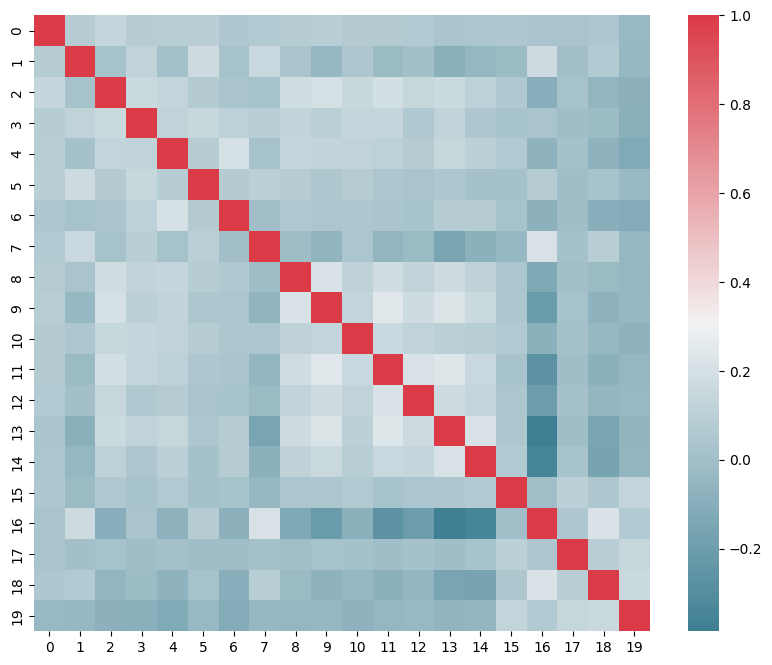

In [ ]:
import seaborn as sns

f, ax = plt.subplots(figsize=(10, 8))
corr =  mdl.get_correlations()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

# Hierarchial LDA

In [ ]:
from pyvis.network import Network

In [ ]:
from nltk.tokenize import RegexpTokenizer
from gensim import corpora
from gensim.models import HdpModel

In [ ]:

def remove_stopwords(documents):
    stop_words = set(stopwords_list)
    cleaned_documents = []

    for doc in documents:
        # Tokenize the document into words
        words = nltk.word_tokenize(doc)

        # Remove stopwords and words not complying with the pattern
        cleaned_words = [word for word in words if word.lower() not in stop_words and re.match(r'\b[a-zA-Z]{4,}\b', word)]

        # Join the cleaned words back into a document
        cleaned_doc = ' '.join(cleaned_words)

        cleaned_documents.append(cleaned_doc)

    return cleaned_documents

# Example usage:
hdldocuments = remove_stopwords(cleaned_documents)


In [ ]:
from gensim.models import LdaModel

In [ ]:
#hdl_tokenized_documents = [doc.split() for doc in lemmatized_documents]
dictionary = corpora.Dictionary(lemmatized_documents)
corpus2 = [dictionary.doc2bow(doc) for doc in lemmatized_documents]

In [ ]:
hdp_model = HdpModel(corpus=corpus2, id2word=dictionary)


In [ ]:
dictionary = corpora.Dictionary(lemmatized_documents)
corpus2 = [dictionary.doc2bow(doc) for doc in lemmatized_documents]


hdp_model = HdpModel(corpus=corpus, id2word=dictionary)


ValueError: ignored

In [ ]:
topics = hdp_model.show_topics(num_words = 5)
for topic in topics:
    print(topic)

(0, '0.004*people + 0.004*time + 0.003*also + 0.003*year + 0.003*system')
(1, '0.006*armenian + 0.004*turkish + 0.004*window + 0.004*drive + 0.003*people')
(2, '0.004*people + 0.003*good + 0.003*also + 0.002*right + 0.002*time')
(3, '0.003*anyone + 0.003*system + 0.002*really + 0.002*people + 0.002*work')
(4, '0.003*people + 0.003*right + 0.002*well + 0.002*militia + 0.002*time')
(5, '0.002*please + 0.002*number + 0.002*also + 0.002*year + 0.001*game')
(6, '0.004*nrhj + 0.003*tq,3 + 0.003*b8e,3 + 0.002*1d9l+ + 0.002*b4q,3')
(7, "0.002*'ax= + 0.002*b4q,3 + 0.002*r'ax + 0.002*mb8f + 0.001*tq,3")
(8, '0.001*=w7= + 0.001*mx^- + 0.001*t4\\/ + 0.000*zrlk + 0.000*bn/c')
(9, '0.003*people + 0.002*scsi-1 + 0.002*problem + 0.002*scsi-2 + 0.002*jesus')
(10, '0.003*health + 0.003*tobacco + 0.002*smokeless + 0.002*1993 + 0.002*people')
(11, '0.004*period + 0.002*power + 0.002*play + 0.002*shot + 0.001*scorer')
(12, '0.000*window + 0.000*battery + 0.000*want + 0.000*memory + 0.000*idea')
(13, '0.000

In [ ]:
hdp_model.show_topics()




Topic ID: 0
Top Words:  ['people', 'time', 'also', 'year', 'system', 'good', 'right', 'thing', 'even', 'well', 'problem', 'work', 'file', 'many', 'much', 'first', 'want', 'need', 'question', 'used']


AttributeError: ignored

In [ ]:
topics = ctm_model.show_topics(num_topics = 20 , num_words = 5)
for topic in topics:
    print(topic)

In [ ]:
hdp_model.topic_info()

In [ ]:
from gensim.models import CtModel



In [ ]:
import gensim
from gensim.corpora import Dictionary
from gensim.models import LdaModel
from gensim.models import CoherenceModel

# Assuming you have preprocessed documents stored in a list called 'preprocessed_documents'
# Create a dictionary from the preprocessed documents
dictionary = Dictionary(preprocessed_documents)

# Create the corpus
corpus = [dictionary.doc2bow(doc) for doc in preprocessed_documents]

# Set the number of topics
num_topics = 10

# Train the LDA model with asymmetric topic distributions
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, alpha='asymmetric')

# Print the topics and their associated words
topics = lda_model.show_topics(num_topics=num_topics)
for topic in topics:
    print(topic)

# Calculate the coherence score to evaluate the quality of the topics
coherence_model = CoherenceModel(model=lda_model, texts=preprocessed_documents, dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model.get_coherence()
print("Coherence Score:", coherence_score)
